In [7]:
import plotly.express as px
import pandas as pd

In [5]:
data = pd.read_csv("./Country_Medals.csv", delimiter=";")

In [6]:
data.head()

,Year,Country_Code,Country_Name,Host_city,Host_country,Gold,Silver,Bronze
0,1932,(USA),United States,Los Angeles,United States,41,32,30
1,1932,(ITA),Italy,Los Angeles,United States,12,12,12
2,1932,(FRA),France,Los Angeles,United States,10,5,4
3,1932,(SWE),Sweden,Los Angeles,United States,9,5,9
4,1932,(JPN),Japan,Los Angeles,United States,7,7,4


In [37]:
top10 = data.groupby("Country_Name")[["Gold", "Silver", "Bronze"]].sum()["Gold"].sort_values(ascending=False)[:10]
top10

Country_Name
United States    1060
Soviet Union      395
Great Britain     284
China             262
France            223
Italy             219
Germany           202
Hungary           181
Japan             169
Australia         164
Name: Gold, dtype: int64

In [38]:
top10.index.values

array(['United States', 'Soviet Union', 'Great Britain', 'China',
       'France', 'Italy', 'Germany', 'Hungary', 'Japan', 'Australia'],
      dtype=object)

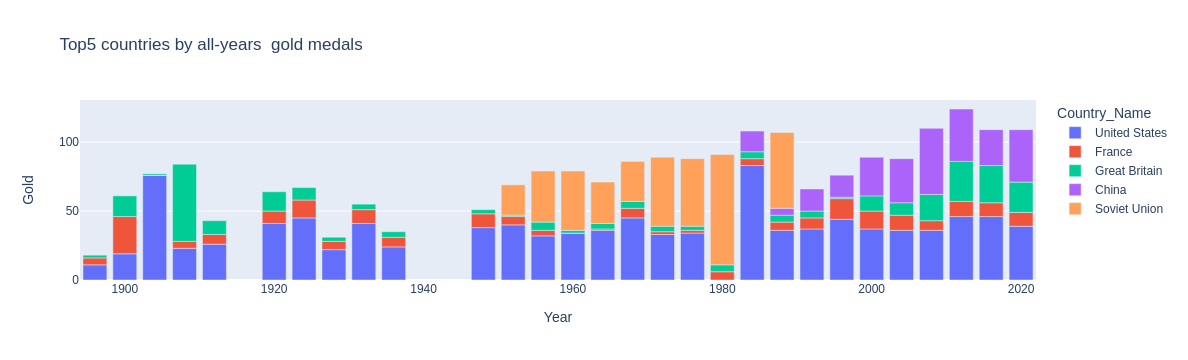

In [41]:
fig = px.bar(data[data["Country_Name"].isin(top10.index.values[:5])], x="Year", y="Gold", color="Country_Name", title = "Top5 countries by all-years  gold medals")
fig

In [42]:
fig.write_html("olympics.html")